# Sprint 論文読解入門
以下の論文を読み問題に答えてください。CNNを使った物体検出（Object Detection）の代表的な研究です。                        
[8]Ren, S., He, K., Girshick, R., Sun, J.: Faster r-cnn: Towards real-time object detection with region proposal networks. In: Advances in neural information processing systems. (2015) 91–99                     
https://arxiv.org/pdf/1506.01497.pdf                               
# 条件
* 答える際は論文のどの部分からそれが分かるかを書く。                      
* 必要に応じて先行研究（引用されている論文）も探しにいく。最低2つは他の論文を利用して回答すること。
* 論文の紹介記事を見ても良い。ただし、答えは論文内に根拠を探すこと。
    
## Fast R-CNN
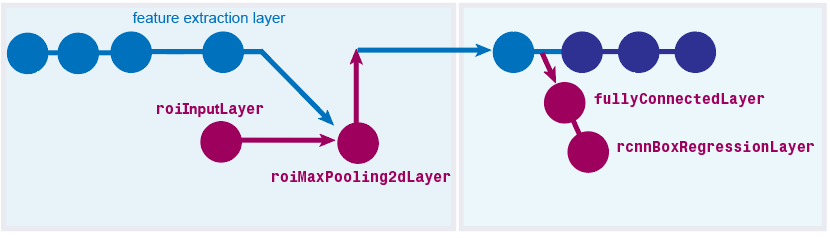

## Faster R-CNN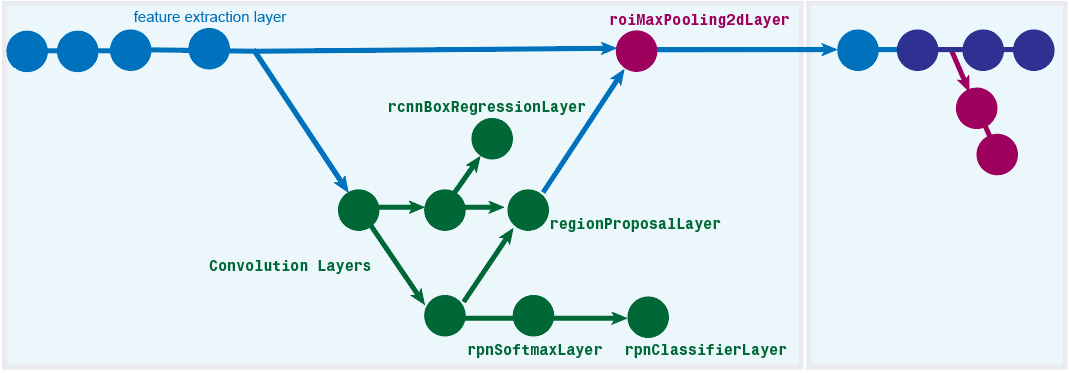
こーいうのをEnd to End的というらしい．                     
コード：https://jp.mathworks.com/help/vision/ug/faster-r-cnn-examples.html#mw_b8f52495-708c-4084-adee-e346df1f0ebd

## 単語メモ
* RegionProposal : 候補領域，物体領域予測
* Region Proposal Network : RPN
* ROI : Region Of Interest＝関心領域．監視対象として重要な箇所を枠で囲いフレームレートおよび画質を高くして、重要でない箇所はフレームレートおよび画質を落とし、効率の良い録画を行うための機能
* Selective Search : ピクセルレベルで類似する領域をグルーピングしていくことで候補領域を選出するアルゴリズムです。要は似たような特徴を持つ領域を結合していき、１つのオブジェクトとして抽出する訳です。
* EdgeBoxes : MicroSoftが開発．エッジを使用してオブジェクト境界ボックスの提案を生成する
* 物体検出についてわかりやすい図https://qiita.com/GushiSnow/items/8c946208de0d6a4e31e7
* 画像認識についてわかりやすいスライドhttps://www.slideshare.net/takahirokubo7792/nlpaperchallenge-nlpcv-7-139794044
* 画像ピラミッド : 通常私達は一定サイズの画像を使います．しかし，同一画像を様々な解像度で処理をする必要がある時もあります．例えば画像中で何かを探すとき(例えば顔)，画像中にどのような大きさで現れるか分かりません．そのような状況では様々な解像度の画像を用意し，全画像に対して物体検出を試みます．これらの異なる解像度を持つ画像の集合を画像ピラミッド(最大解像度の画像を下に，最小解像度の画像を上に積むとピラミッドのようになるからです)と呼びます．

# (1) 物体検出の分野にはどういった手法が存在したか
### 物体検出ネットワーク
* SPPnet       
CNNでは扱えなかった可変長データも扱えるモデル．                    
R-CNNのように畳み込み処理を何度も行うのではなく，画像全体から特徴マップを１回だけ計算することで計算時間を短縮した．         
最大の特徴は，最後の畳み込み層の上に**SPP(Spatial Pyramid Pooling)**と呼ばれるプーリングを実装することで、入力の画像サイズに関わらず，固定長の出力を得ることができるので，入力が固定ではなく可変サイズに変更できること           
>[1] K. He, X. Zhang, S. Ren, and J. Sun, “Spatial pyramid pooling in deep convolutional networks for visual recognition,” in European Conference on Computer Vision (ECCV), 2014.より
* Fast R-CNN                     
Fast R-CNNは,画像認識を行う際に毎回CNNを走らせる必要がなく，RegionProposal（物体領域予測）の抽出した特徴領域を切り出し、全結合層に与えるだけでよい。従来のR-CNNが画像認識毎にCNN層も走らせていたのに比べると大幅な高速化を達成できる。                  
たぶんだけど，Fast R-CNNのRegionProposalには，Selective Searchが使われていた．そこをRPNに変えたのが，Faster R-CNN

>ABSTRACTより：Advances like SPPnet [1] and Fast R-CNN [2] have reduced the running time of these detection networks, exposing region proposal computation as a bottleneck. 

### 物体検出手法（RELATED WORK３～６行目）
#### スーパーピクセルのグループ化によるもの
* Selective Search : ピクセルレベルで類似する領域をグルーピングしていくことで候補領域を選出する
* CPMC : 個々のオブジェクトクラスのプロパティを事前に知らなくても自動的に抽出できる
>[22] J. Carreira and C. Sminchisescu, “CPMC: Automatic object segmentation using constrained parametric min-cuts,” IEEE Transactions on Pattern Analysis and Machine Intelligence (TPAMI), 2012.
* MCG 
#### スライドウィンドウに基づくもの
* objectness in windows
* EdgeBoxes 
>Widely used object proposal methods include those based on grouping super-pixels (e.g., Selective Search [4], CPMC [22], MCG [23]) and those based on sliding windows (e.g., objectness in windows [24], EdgeBoxes [6]). Object proposal methods were adopted as external modules independent of the detectors (e.g., Selective Search [4] object detectors, R-CNN [5], and Fast R-CNN [2]).

# (2) Fasterとあるが、どういった仕組みで高速化したのか
* 従来，Selective Searchで行っていた候補領域(region proposals)の検出処理を，RPN (Region Proposal Network)というニューラルネットワークに置き換えた          
* Fast R-CNNでは，画像を物体検出（Selective Search）と特徴マップ抽出（CNN）を別々に行っていた．Faster R-CNNでは，まずCNNで特徴マップを抽出し，その特徴マップに対してregion proposalsに当たる部分を抽出することで，End to Endでトレーニングでき，高速化した．
>RELATED WORKより                       
Deep Networks for Object Detection. The R-CNN method [5] trains CNNs end-to-end to classify the proposal regions into object categories or background. R-CNN mainly plays as a classifier, and it does not predict object bounds (except for refining by bounding box regression).のあたりとか

# (3) One-Stageの手法とTwo-Stageの手法はどう違うのか。
領域提案部分が独立しているかしていないか．                        
One-Stageでは，物体検出とクラス分類を同時に行い，Two-Stageでは物体検出部分は独立している．              
すなわち，Faster R-CNNはTwo-Stageの手法である．               
本論文では，One-StageよりTwo-Stageの方が精度（mAP：平均適合率の平均）が良いとされている．現在はTwo-Stageの精度を維持したままで，One-Stageでアプローチすることにより，より高速化を図っている（YOLOなど）                       
している                      
One-Stage Detection vs. Two-Stage Proposal + Detectionより．                    

# (4) RPNとは何か。
* CNNのから出てきた特徴マップを入力とする．
* その特徴マップに対して，任意の大きさのウィンドウをスライドさせていく．
* 各スライドウィンドウの重心に対して，９種類のアンカーをあてる．
* その情報（各アンカーの座標）を正解ラベルと照らし合わせ，損失を計算する．（IoU）
* IoUが0.7以上のアンカー，もしくは最大のアンカーを残し，それが物体．→　これがRPNの出力となる（最も当てはまりの良かったアンカーの座標情報）
* IoUが0.3未満のアンカーは背景である．      
>REGION PROPOSAL NETWORKSより             
3 FASTER R-CNN  
3.1 Region Proposal Networks  
A Region Proposal Network (RPN) takes an image (of any size) as input and outputs a set of rectangular object proposals, each with an objectness score.3 We model this process with a fully convolutional network  
At each sliding-window location, we simultaneously predict multiple region proposals, where the number of maximum possible proposals for each location is denoted as k. So the reg layer has 4k outputs encoding the coordinates of k boxes, and the cls layer outputs 2k scores that estimate probability of object or not object for each proposal  

* 画像から目的の物体を認識してその部分を切り取る技術　　
* 高さ・幅・アスペクト比が異なるアンカーボックスを用意する  
* 特徴量マップ上のスライディングウインドウ毎にアンカーボックスを当てはめ、正解ラベルと一致率が高いものを１、それ以外を０に割り振る  
* その座標を損失関数として、損失が小さくなるように学習する  
* 学習したパラメータを元に物体の領域を提案する

# (5) RoIプーリングとは何か。
* RPNで抽出したアンカーの座標情報と，CNNから出てきた特徴マップを合わせ，物体のみの画像にする
* それに対して，Maxプーリングを行い，各物体画像のサイズをそろえる

>Sharing Features for RPN and Fast R-CNNより                    
The RoI pooling layer [2] in Fast R-CNN accepts the convolutional features and also the predicted bounding boxes as input,

# (6) Anchorのサイズはどうするのが適切か。
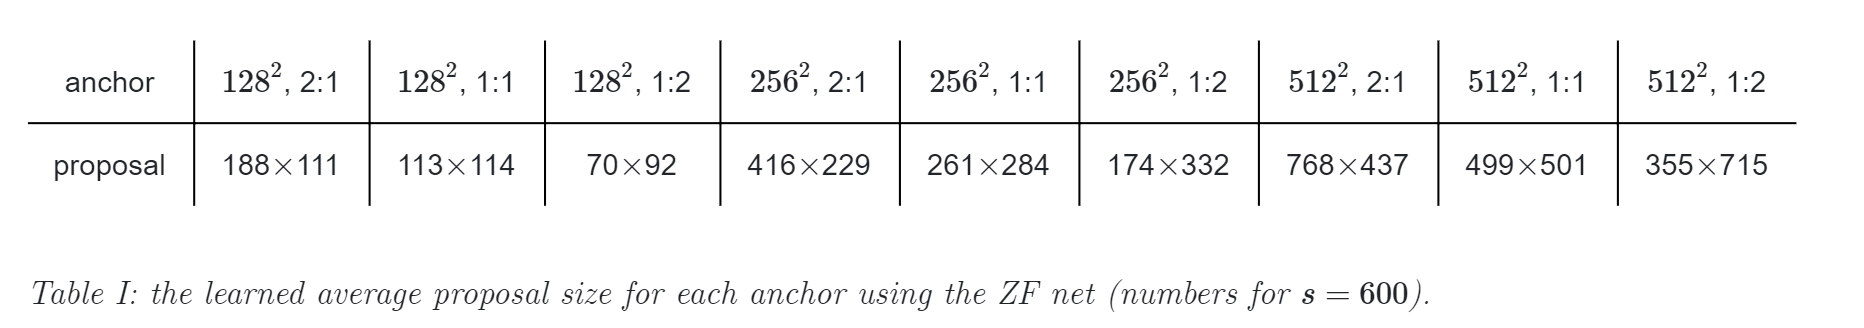                  
>3.2SHARING FEATURES FOR RPN AND FAST R-CNNより

# (7) 何というデータセットを使い、先行研究に比べどういった指標値が得られているか.
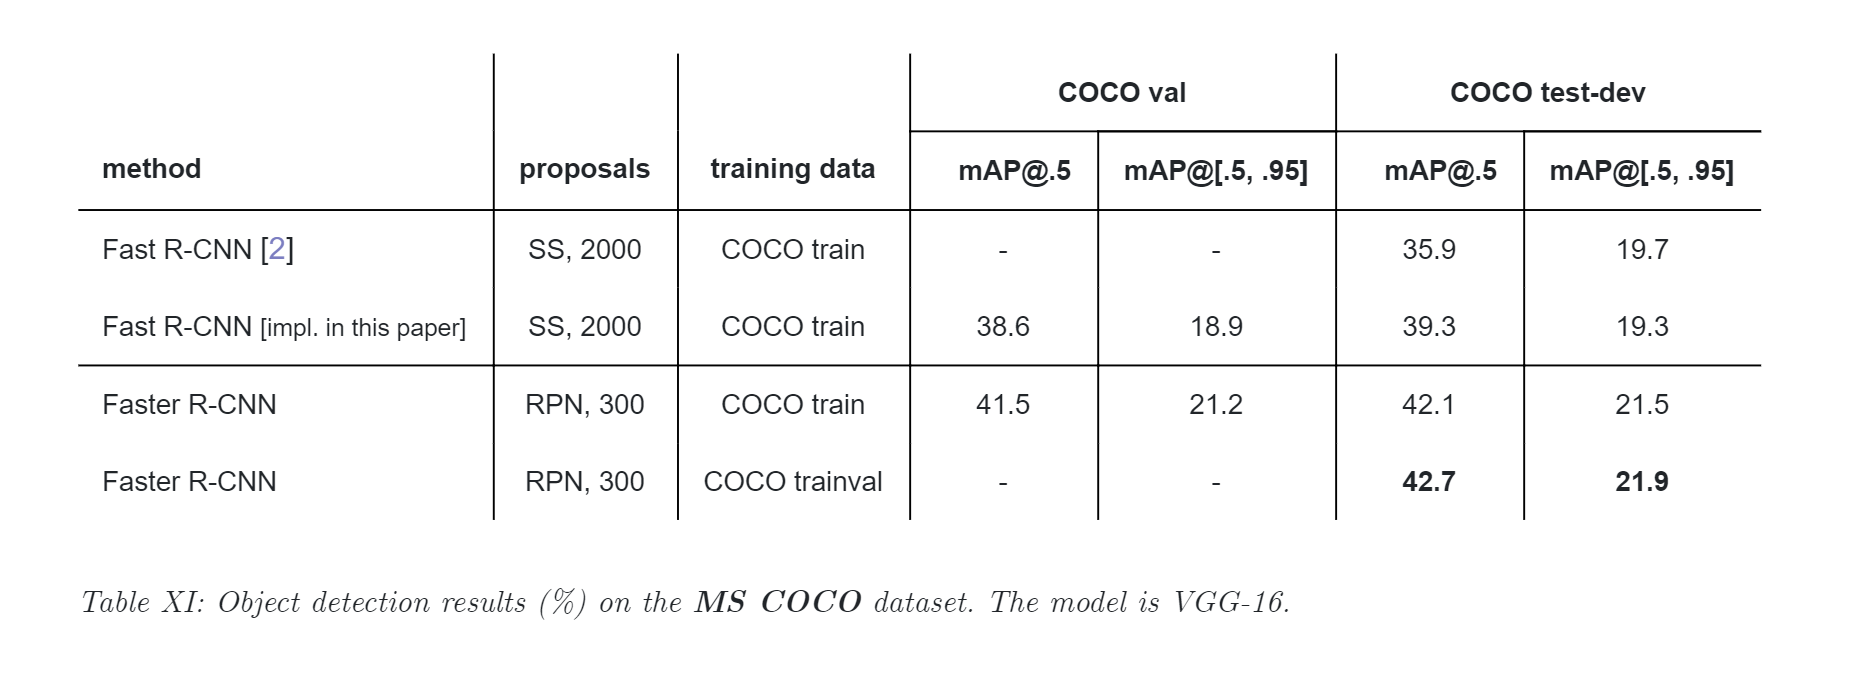
* MS COCOデータセットを使用
* 先行研究に比べ高いmAPを得られており，計算速度も早い
>4.1EXPERIMENTS ON PASCAL VOCより